Initial Data:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Missing values:
 Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Removed Outliers: 0 rows dropped

--- Classification Metrics ---
True Negatives (TN)      : 50
False Positives (FP)     : 2
False Negatives (FN)     : 7
True Positives (TP)      : 21
Accuracy                 : 0.8875
Error Rate               : 0.11250000000000004
Precision                : 0.9130434782608695
Recall                   : 0.75


C:\Users\Admin\AppData\Local\Temp\ipykernel_8704\2665166133.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8704\2665166133.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

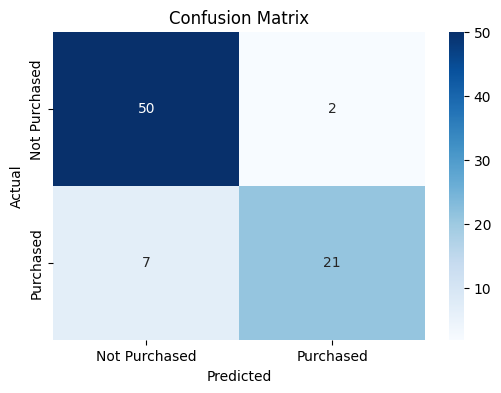

In [2]:
# Lab Assignment 5: Logistic Regression with Preprocessing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Downloads/Social_Network_Ads.csv")
print("Initial Data:\n", df.head())

# --- 1. Preprocessing ---

# Drop User ID (not useful for prediction)
df.drop("User ID", axis=1, inplace=True)

# Encode 'Gender' (Male=1, Female=0)
df["Gender"] = df["Gender"].astype("category").cat.codes

# Check and fill missing values (if any)
print("\nMissing values:\n", df.isnull().sum())
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Remove outliers using Z-score method
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_cleaned = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]
print(f"\nRemoved Outliers: {df.shape[0] - df_cleaned.shape[0]} rows dropped")

# Separate features and target
X = df_cleaned.drop("Purchased", axis=1)
y = df_cleaned["Purchased"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 2. Model Training ---
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- 3. Evaluation ---

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
metrics_dict = {
    "True Negatives (TN)": tn,
    "False Positives (FP)": fp,
    "False Negatives (FN)": fn,
    "True Positives (TP)": tp,
    "Accuracy": accuracy,
    "Error Rate": error_rate,
    "Precision": precision,
    "Recall": recall
}
print("\n--- Classification Metrics ---")
for key, value in metrics_dict.items():
    print(f"{key:<25}: {value}")

# --- 4. Plot Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Purchased", "Purchased"],
            yticklabels=["Not Purchased", "Purchased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
